# <font style = "color:rgb(50,120,229)">Data Description</font>

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

# <font style = "color:rgb(50,120,229)">Domain</font>
Cement manufacturing

# <font style = "color:rgb(50,120,229)">Context</font>
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

# <font style = "color:rgb(50,120,229)">Attribute Information</font>

- Cement : measured in kg in a m3 mixture
- Blast : measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture
- Age : day (1~365)
- Concrete compressive strength measured in MPa

# <font style = "color:rgb(50,120,229)">Learning Outcomes</font>

- Exploratory Data Analysis
- Building ML models for regression
- Hyper parameter tuning

# <font style = "color:rgb(50,120,229)">Objective</font>
Modeling of strength of high performance concrete using Machine Learning

# <font style = "color:rgb(50,120,229)">Steps and tasks</font>

## <font style = "color:rgb(50,120,229)">Deliverable-1: Exploratory Data Analysis Quality Report</font>

### <font style = "color:rgb(8,133,37)">Import Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### <font style = "color:rgb(8,133,37)">Univariate Analysis</font>

We will start off by reading the data.

In [2]:
df = pd.read_csv("concrete.csv")

Let's see first 5 rows of the dataframe.

In [3]:
# View first 5 rows
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
# Print the shape of the dataframe
print("Number of rows: {}, number of columns: {}".format(df.shape[0],df.shape[1]))

Number of rows: 1030, number of columns: 9


The 8 input quantitative variables are as follows:

- `cement`
- `slag`
- `ash`
- `water`
- `superplastic`
- `coarseagg`
- `fineagg`
- `age`

The output quantitative variable is:

- `strength`

In [5]:
# Data types of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# Range of values observed
# Central values
# Standard Deviation
# Quartiles
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


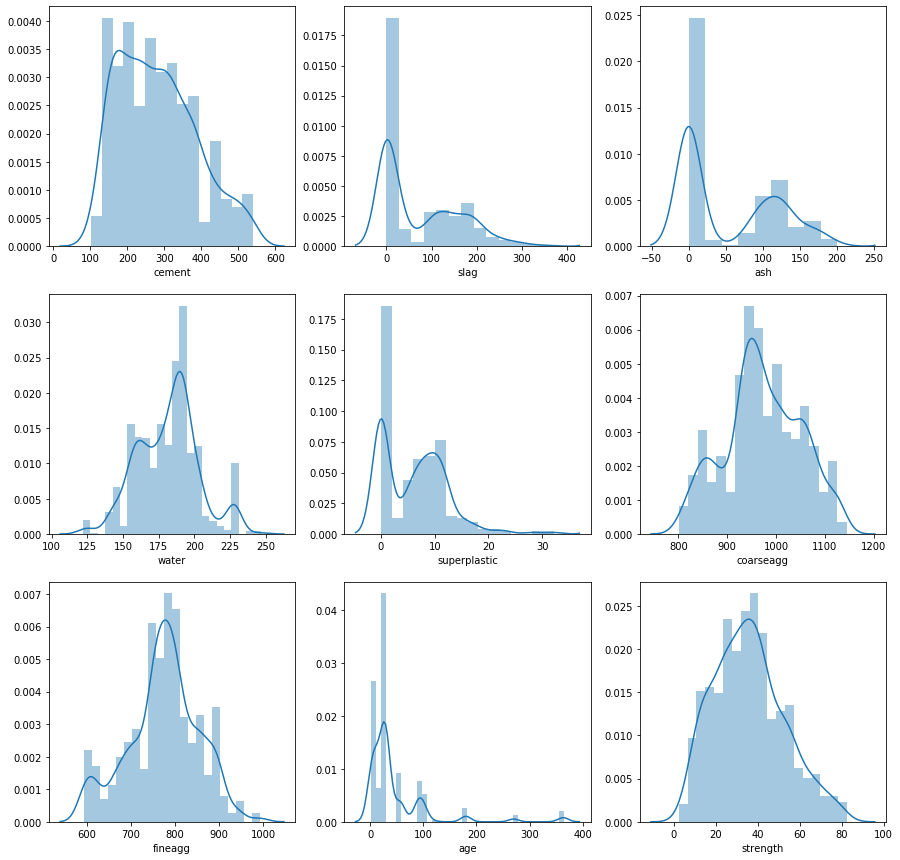

In [7]:
# Distribution
plt.figure(figsize=(15,15))

for col in range(len(df.columns)):
    # Plot on a subplot
    plt.subplot(3,3,col+1)
    sns.distplot(df[df.columns[col]])
plt.show()

In [8]:
# Percentage of Missing values
df.isna().sum()/(len(df.index)) * 100

cement          0.0
slag            0.0
ash             0.0
water           0.0
superplastic    0.0
coarseagg       0.0
fineagg         0.0
age             0.0
strength        0.0
dtype: float64

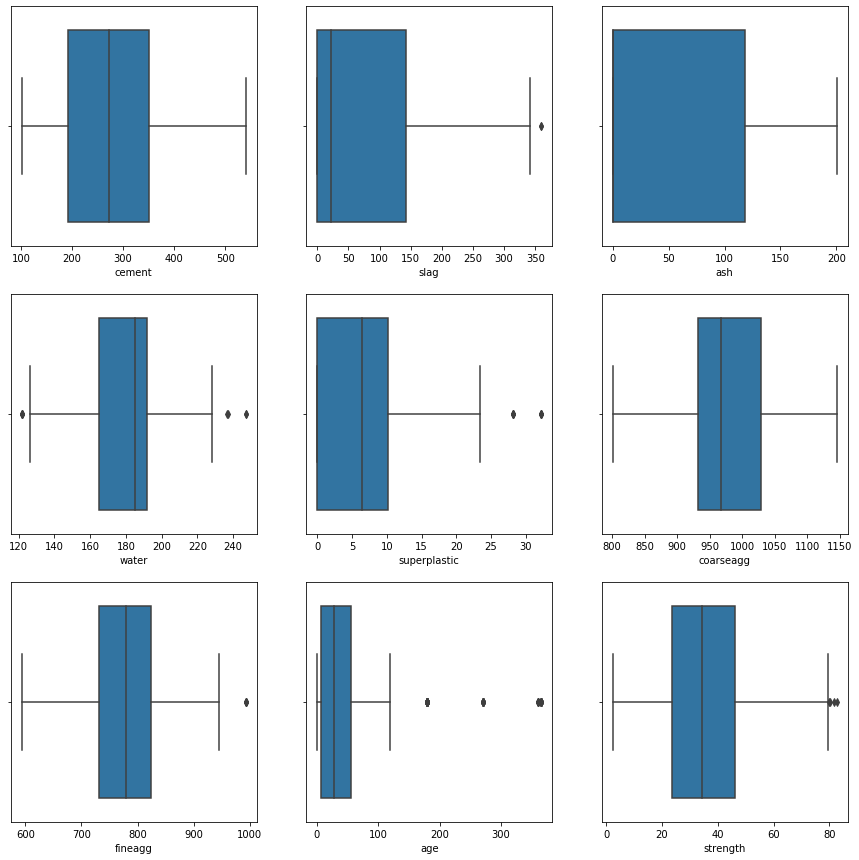

In [9]:
# Outliers
plt.figure(figsize=(15,15))

for col in range(len(df.columns)):
    # Plot on a subplot
    plt.subplot(3,3,col+1)
    sns.boxplot(df[df.columns[col]])
plt.show()

Let's write a custom function for printing univariate summary.

In [10]:
def printUnivariateSummary(attr):
    print("================================================")
    print("Summary of {}".format(attr))
    
    # Data Type
    print("Data Type: {}".format(df[attr].dtype))
    
    # Range of values
    print("Minimum Value: {}".format(df[attr].min()))
    print("Maximum Value: {}".format(df[attr].max()))
    
    # Central Values
    print("Median: {}".format(df[attr].median()))
    print("Mean: {}".format(df[attr].mean()))
    
    # Standard Deviation
    print("Standard Deviation: {}".format(df[attr].std()))
    
    # Quartiles
    print("25% quartile: {}".format(np.quantile(df[attr],0.25)))
    print("50% quartile: {}".format(np.quantile(df[attr],0.50)))
    print("75% quartile: {}".format(np.quantile(df[attr],0.75)))
    print("IQR: {}".format(np.quantile(df[attr],0.75)-np.quantile(df[attr],0.25)))
    
    # Missing Values
    print("Missing Values: {}".format(df[attr].isna().sum()))
    
    # Outlier Detection
    Q3 = np.quantile(df[attr],0.75)
    Q1 = np.quantile(df[attr],0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    
    print("Number of outliers in upper range: {}".format(df[df[attr]>upper_range][attr].count()))
    print("Number of outliers in lower range: {}".format(df[df[attr]<lower_range][attr].count()))
    print("Percentage of outliers in upper range: {}".format(
        df[df[attr]>upper_range][attr].count()*100/len(df.index)))
    print("Percentage of outliers in lower range: {}".format(
        df[df[attr]<lower_range][attr].count()*100/len(df.index)))
    
    # Distribution
    plt.title("Distribution Plot for {}".format(attr))
    sns.distplot(df[attr])
    plt.show()
    
    # Outliers
    plt.title("Box Plot for {}".format(attr))
    sns.boxplot(df[attr])
    plt.show()
    print("================================================")

Let's start going over each attribute.

#### <font style = "color:rgb(8,133,37)">Cement</font>

**`cement`** attribute is the effect of **cement** (measured in kg in a m3 mixture) on the concrete compressive strength.

Summary of cement
Data Type: float64
Minimum Value: 102.0
Maximum Value: 540.0
Median: 272.9
Mean: 281.16786407766995
Standard Deviation: 104.50636449481532
25% quartile: 192.375
50% quartile: 272.9
75% quartile: 350.0
IQR: 157.625
Missing Values: 0
Number of outliers in upper range: 0
Number of outliers in lower range: 0
Percentage of outliers in upper range: 0.0
Percentage of outliers in lower range: 0.0


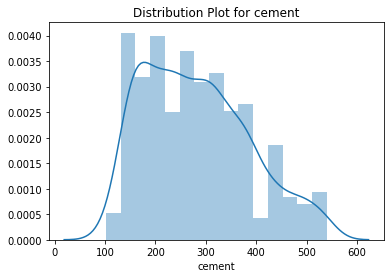

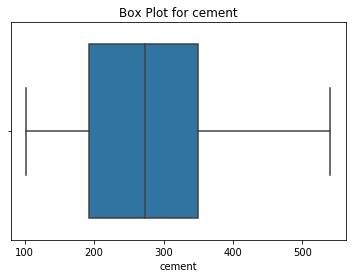

In [11]:
printUnivariateSummary("cement")

**Outliers** - We can clearly see that there are no outliers in the **`cement`** column.

**Gaussians** - Cement has an approximately normal distribution.

#### <font style = "color:rgb(8,133,37)">Slag</font>

**`slag`** attribute is the effect of **blast furnace slag** (measured in kg in a m3 mixture) on the concrete compressive strength.

Summary of slag
Data Type: float64
Minimum Value: 0.0
Maximum Value: 359.4
Median: 22.0
Mean: 73.89582524271844
Standard Deviation: 86.27934174810582
25% quartile: 0.0
50% quartile: 22.0
75% quartile: 142.95
IQR: 142.95
Missing Values: 0
Number of outliers in upper range: 2
Number of outliers in lower range: 0
Percentage of outliers in upper range: 0.1941747572815534
Percentage of outliers in lower range: 0.0


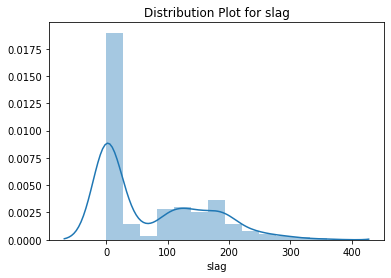

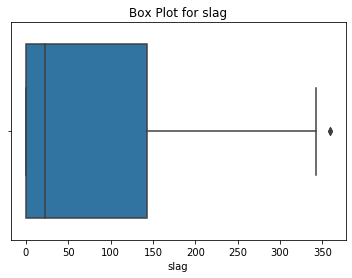

In [12]:
printUnivariateSummary("slag")

**Outliers** - We can clearly see that there are 2 outliers in the **`slag`** column.

**Gaussians** - Slag has two to three gaussians and is rightly skewed.

#### <font style = "color:rgb(8,133,37)">Ash</font>

**`ash`** attribute is the effect of **fly ash** (measured in kg in a m3 mixture) on the concrete compressive strength.

Summary of ash
Data Type: float64
Minimum Value: 0.0
Maximum Value: 200.1
Median: 0.0
Mean: 54.18834951456311
Standard Deviation: 63.99700415268765
25% quartile: 0.0
50% quartile: 0.0
75% quartile: 118.3
IQR: 118.3
Missing Values: 0
Number of outliers in upper range: 0
Number of outliers in lower range: 0
Percentage of outliers in upper range: 0.0
Percentage of outliers in lower range: 0.0


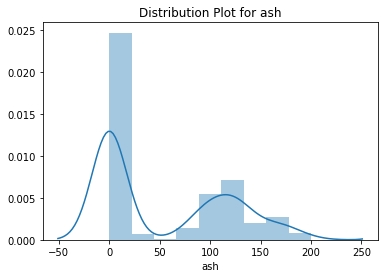

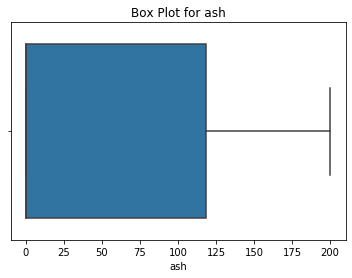

In [13]:
printUnivariateSummary("ash")

**Outliers** - We can clearly see that there are no outliers in the **`ash`** column.

**Gaussians** - Ash has two clear gaussians and is rightly skewed.

#### <font style = "color:rgb(8,133,37)">Water</font>

**`water`** attribute is the effect of **water** (measured in kg in a m3 mixture) on the concrete compressive strength.

Summary of water
Data Type: float64
Minimum Value: 121.8
Maximum Value: 247.0
Median: 185.0
Mean: 181.56728155339806
Standard Deviation: 21.35421856503247
25% quartile: 164.9
50% quartile: 185.0
75% quartile: 192.0
IQR: 27.099999999999994
Missing Values: 0
Number of outliers in upper range: 4
Number of outliers in lower range: 5
Percentage of outliers in upper range: 0.3883495145631068
Percentage of outliers in lower range: 0.4854368932038835


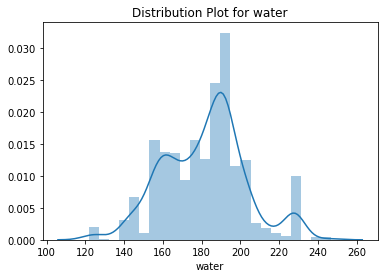

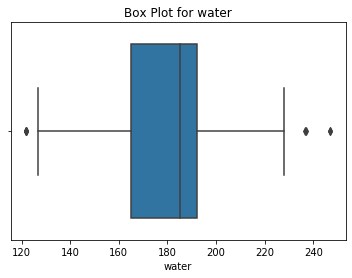

In [14]:
printUnivariateSummary("water")

**Outliers** - We can clearly see that there are a few outliers in the **`water`** column.

**Gaussians** - Water has three gaussians and is slightly left skewed.

#### <font style = "color:rgb(8,133,37)">Superplastic</font>

**`superplastic`** attribute is the effect of **superplasticizer** (measured in kg in a m3 mixture) on the concrete compressive strength.

Summary of superplastic
Data Type: float64
Minimum Value: 0.0
Maximum Value: 32.2
Median: 6.4
Mean: 6.204660194174758
Standard Deviation: 5.97384139248552
25% quartile: 0.0
50% quartile: 6.4
75% quartile: 10.2
IQR: 10.2
Missing Values: 0
Number of outliers in upper range: 10
Number of outliers in lower range: 0
Percentage of outliers in upper range: 0.970873786407767
Percentage of outliers in lower range: 0.0


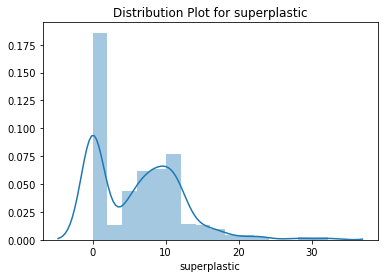

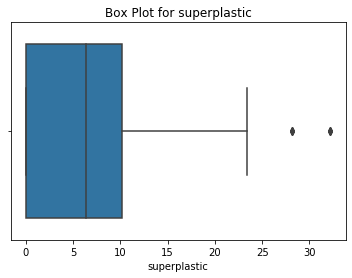

In [15]:
printUnivariateSummary("superplastic")

**Outliers** - We can clearly see that there are 10 outliers in the **`superplastic`** column.

**Gaussians** - Suerplastic has two gaussians and is rightly skewed.

#### <font style = "color:rgb(8,133,37)">Coarseagg</font>

**`coarseagg`** attribute is the effect of **Coarse Aggregate** (measured in kg in a m3 mixture) on the concrete compressive strength.

Summary of coarseagg
Data Type: float64
Minimum Value: 801.0
Maximum Value: 1145.0
Median: 968.0
Mean: 972.9189320388349
Standard Deviation: 77.75395396672077
25% quartile: 932.0
50% quartile: 968.0
75% quartile: 1029.4
IQR: 97.40000000000009
Missing Values: 0
Number of outliers in upper range: 0
Number of outliers in lower range: 0
Percentage of outliers in upper range: 0.0
Percentage of outliers in lower range: 0.0


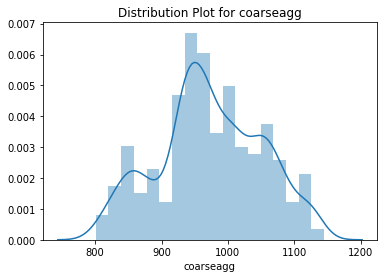

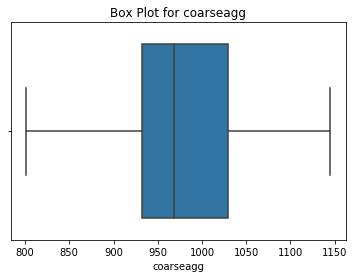

In [16]:
printUnivariateSummary("coarseagg")

**Outliers** - We can clearly see that there are no outliers in the **`coarseagg`** column.

**Gaussians** - Coarseagg has three gaussians and is not skewed.

#### <font style = "color:rgb(8,133,37)">Fineagg</font>

**`fineagg`** attribute is the effect of **Fine Aggregate** (measured in kg in a m3 mixture) on the concrete compressive strength.

Summary of fineagg
Data Type: float64
Minimum Value: 594.0
Maximum Value: 992.6
Median: 779.5
Mean: 773.5804854368931
Standard Deviation: 80.17598014240437
25% quartile: 730.9499999999999
50% quartile: 779.5
75% quartile: 824.0
IQR: 93.05000000000007
Missing Values: 0
Number of outliers in upper range: 5
Number of outliers in lower range: 0
Percentage of outliers in upper range: 0.4854368932038835
Percentage of outliers in lower range: 0.0


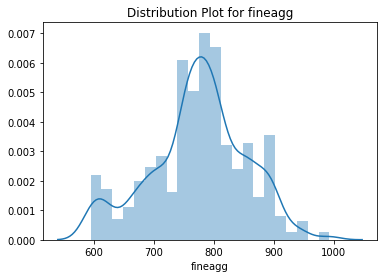

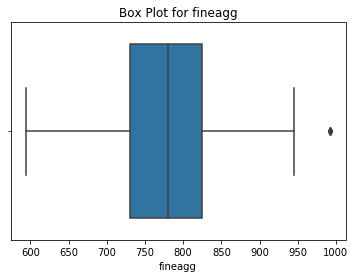

In [17]:
printUnivariateSummary("fineagg")

**Outliers** - We can clearly see that there are 5 outliers in the **`fineagg`** column.

**Gaussians** - Fineagg has 2 gaussians and is not skewed.

#### <font style = "color:rgb(8,133,37)">Age</font>

**`age`** attribute is the effect of **age of the concrete** (measured in days) on the concrete compressive strength.

Summary of age
Data Type: int64
Minimum Value: 1
Maximum Value: 365
Median: 28.0
Mean: 45.662135922330094
Standard Deviation: 63.16991158103249
25% quartile: 7.0
50% quartile: 28.0
75% quartile: 56.0
IQR: 49.0
Missing Values: 0
Number of outliers in upper range: 59
Number of outliers in lower range: 0
Percentage of outliers in upper range: 5.728155339805825
Percentage of outliers in lower range: 0.0


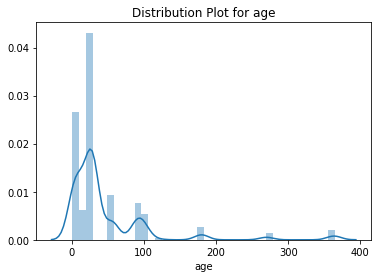

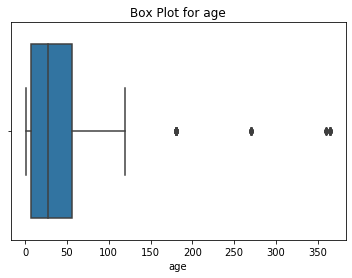

In [18]:
printUnivariateSummary("age")

**Outliers** - We can clearly see that there are a large number of outliers in the **`age`** column.

**Gaussians** - Age has multiple gaussians and is rightly skewed.

### <font style = "color:rgb(8,133,37)">Multivariate Analysis</font>

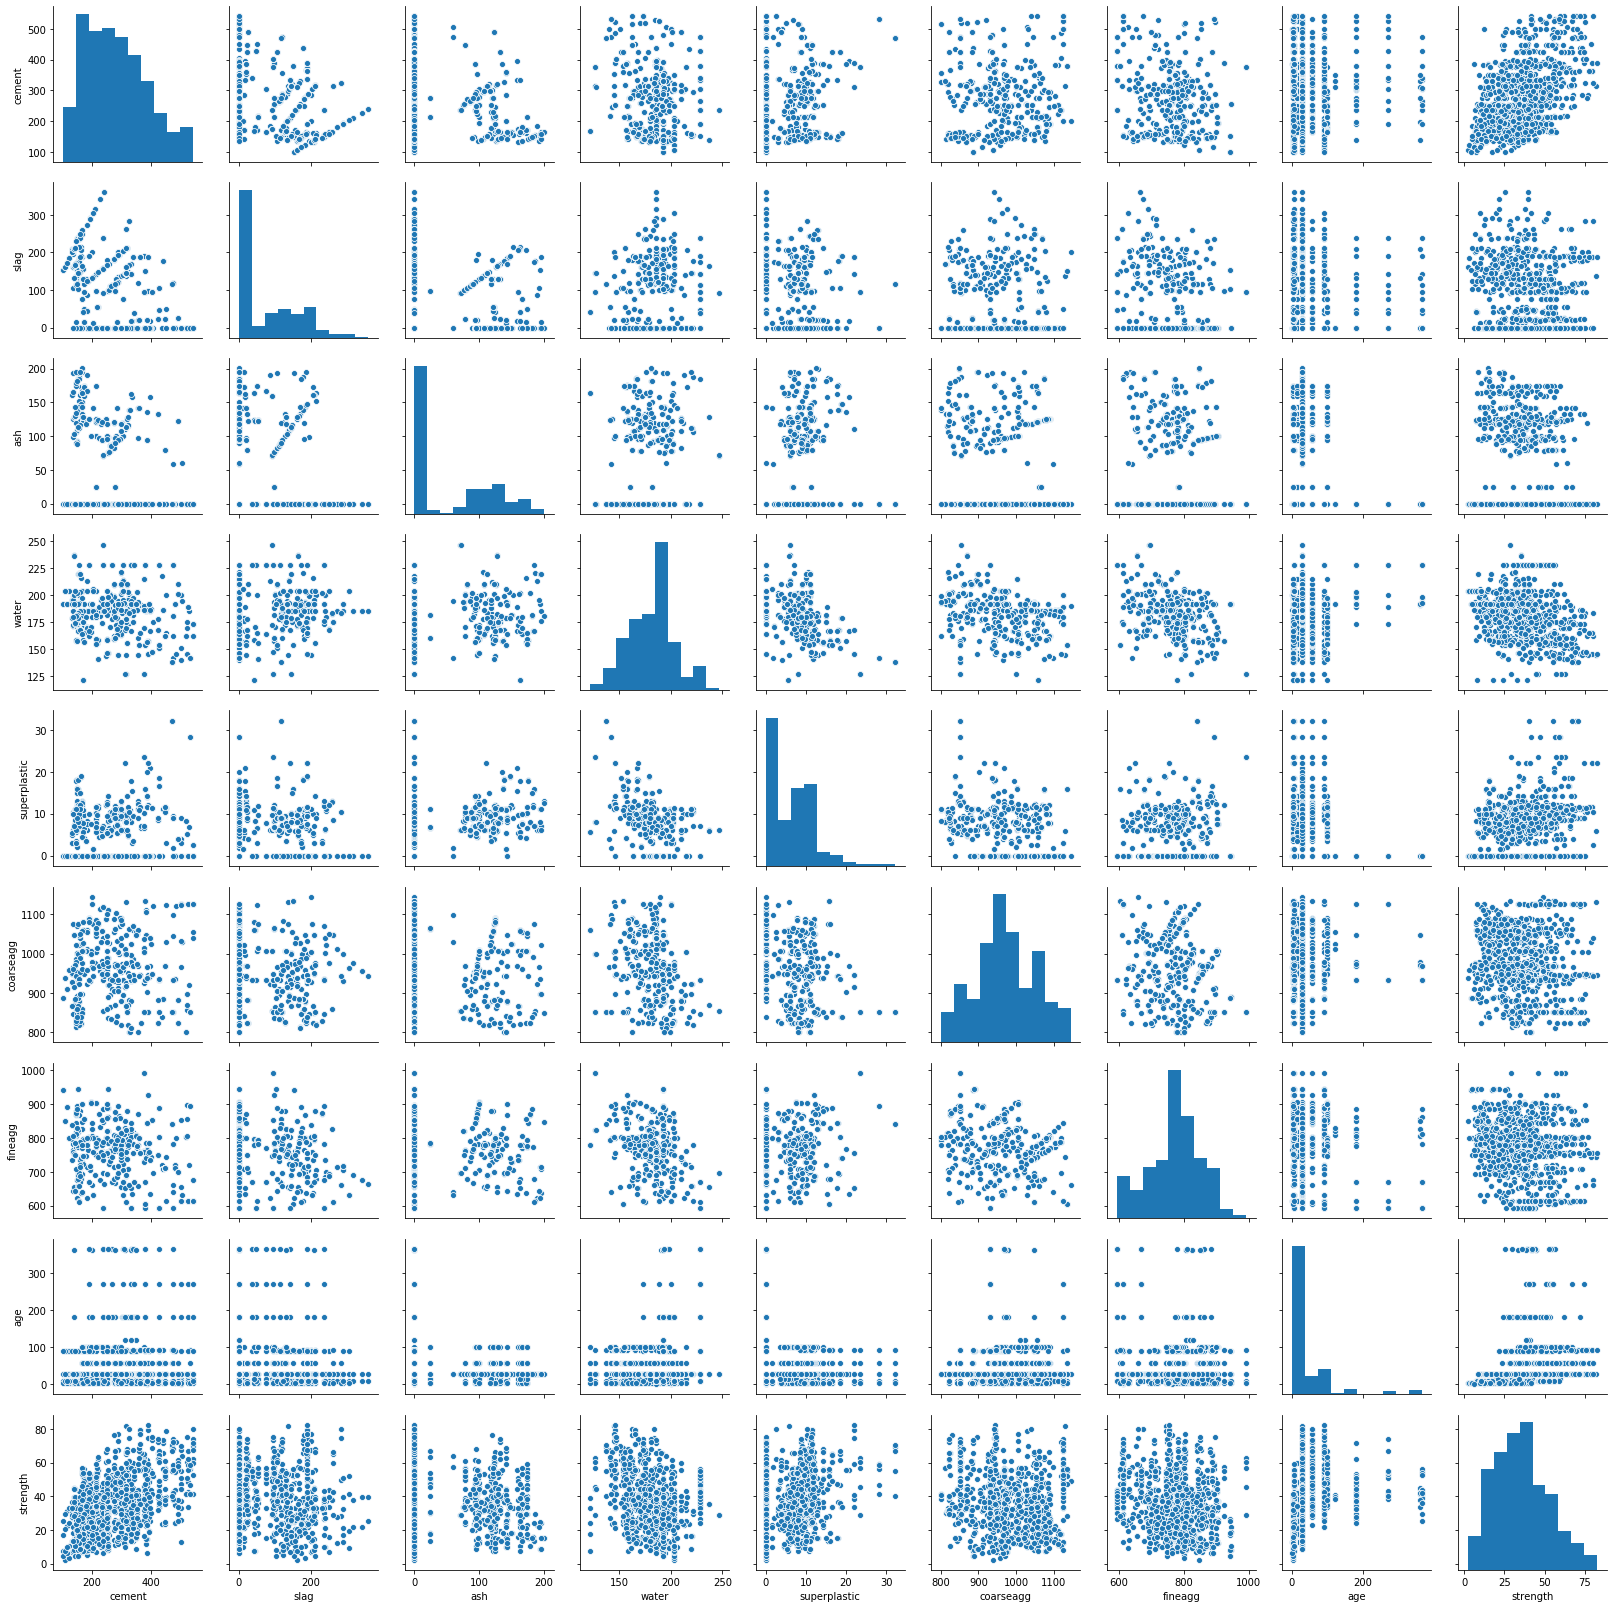

In [19]:
# Pairplot for bivariate analysis
sns.pairplot(df)
plt.show()

**Observations**

- water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes.
- superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.

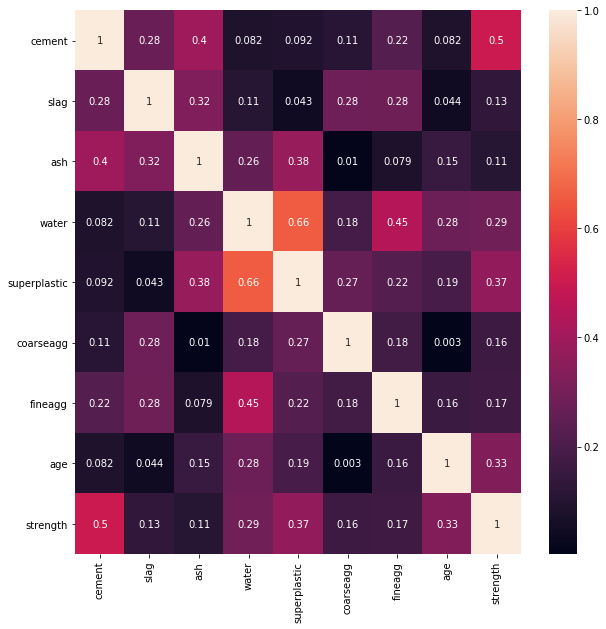

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()), annot=True)
plt.show()

Water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

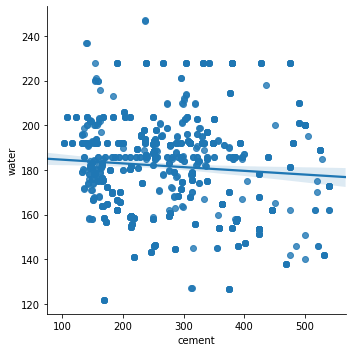

In [21]:
# water vs cement
#lm plot
sns.lmplot(x="cement",y="water",data=df)
plt.show()

We can note the same from the above lmplot.

### <font style = "color:rgb(8,133,37)">Outlier Treatment</font>

We had already seen that there are no missing values. Since we have a very small amount of data, instead of removing outliers, let's replace them with the allowed lowest and highest ranges (`Q1-1.5*IQR` and `Q3+1.5*IQR`) .

In [22]:
# Replacing the outliers by median
for col in df.columns[:-1]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df.loc[(df[col] < low), col] = low
    df.loc[(df[col] > high), col] = high

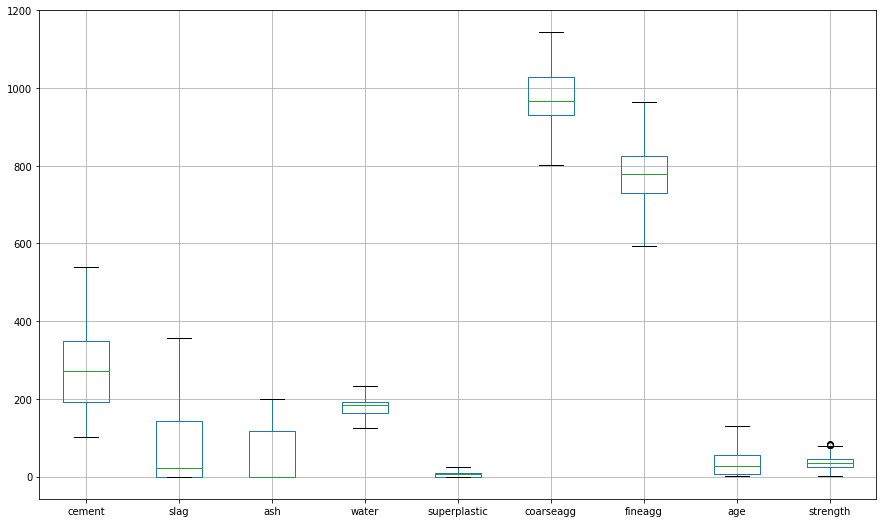

In [23]:
df.boxplot(figsize=(15,9))

As we can see, the outliers in all the independent variables have been modified.

## <font style = "color:rgb(50,120,229)">Deliverable - 2: Feature Engineering Techniques</font>

Before we try to create new features, let's try to go in depth of the topic.

Referring to the paper: **Compressive strength prediction of Portland cement concrete with age using a new model**, we can use the following equations:

$$x = \frac{w}{c + kf + s}\tag{1}$$

Where:

$x$ = water binder ratio

$w$ = water content

$c$ = cement content

$f$ = fly ash content

$s$ = granulated blast furnace slag content

$k$ = efficiency factor

$$\text{Compressive Strength} = \text{constant (A)} \times \ln(\text{age}) + \text{constant (B)}\tag{2}$$

From both the above equations, we can create a new variable **water binder ratio** according to equation (1) and $\ln(\text{age})$ instead of **age**.

### <font style = "color:rgb(8,133,37)">Composite Feature</font>

Let's start off with **water binder ratio**. Since we do not know the efficiency factor $k$, let's try different values of $k$ and see which gives the highest correlation with **`strength`**.

In [24]:
def waterBinderRatio(k):
    df["water_binder_ratio"] = df["water"]/(df["cement"]+k*df["ash"]+df["slag"])
    print("Correlation (k = {:.1f}): {:.2f}".format(k,df["strength"].corr(df["water_binder_ratio"])))

In [25]:
for k in [0.2*x for x in range(-20,20)]:
    waterBinderRatio(k)

Correlation (k = -4.0): 0.08
Correlation (k = -3.8): -0.05
Correlation (k = -3.6): 0.06
Correlation (k = -3.4): -0.04
Correlation (k = -3.2): 0.07
Correlation (k = -3.0): 0.03
Correlation (k = -2.8): 0.02
Correlation (k = -2.6): -0.03
Correlation (k = -2.4): -0.00
Correlation (k = -2.2): 0.08
Correlation (k = -2.0): 0.03
Correlation (k = -1.8): 0.02
Correlation (k = -1.6): 0.04
Correlation (k = -1.4): -0.01
Correlation (k = -1.2): 0.04
Correlation (k = -1.0): -0.10
Correlation (k = -0.8): -0.19
Correlation (k = -0.6): -0.37
Correlation (k = -0.4): -0.45
Correlation (k = -0.2): -0.51
Correlation (k = 0.0): -0.57
Correlation (k = 0.2): -0.61
Correlation (k = 0.4): -0.64
Correlation (k = 0.6): -0.65
Correlation (k = 0.8): -0.64
Correlation (k = 1.0): -0.62
Correlation (k = 1.2): -0.60
Correlation (k = 1.4): -0.57
Correlation (k = 1.6): -0.54
Correlation (k = 1.8): -0.51
Correlation (k = 2.0): -0.48
Correlation (k = 2.2): -0.46
Correlation (k = 2.4): -0.44
Correlation (k = 2.6): -0.42
Corr

Note that the maximum correlation is obtained for **`k = 0.6`**

In [26]:
waterBinderRatio(k=0.6)

Correlation (k = 0.6): -0.65


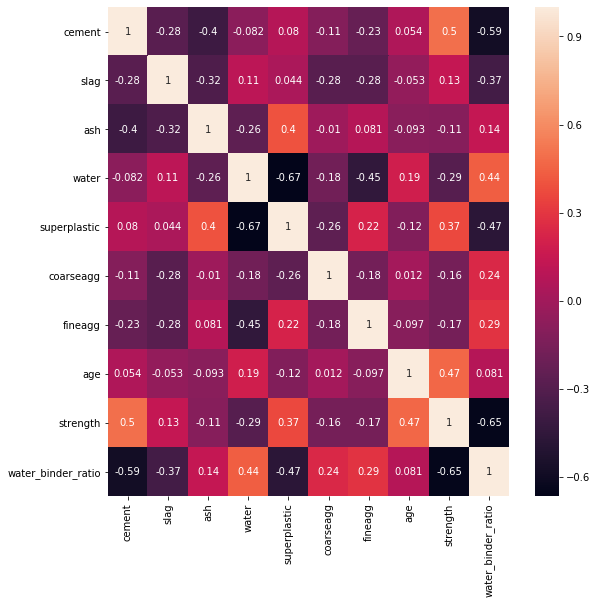

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

Next, let's create $\ln(\text{age})$

In [28]:
df["ln_age"] = np.log(df["age"])

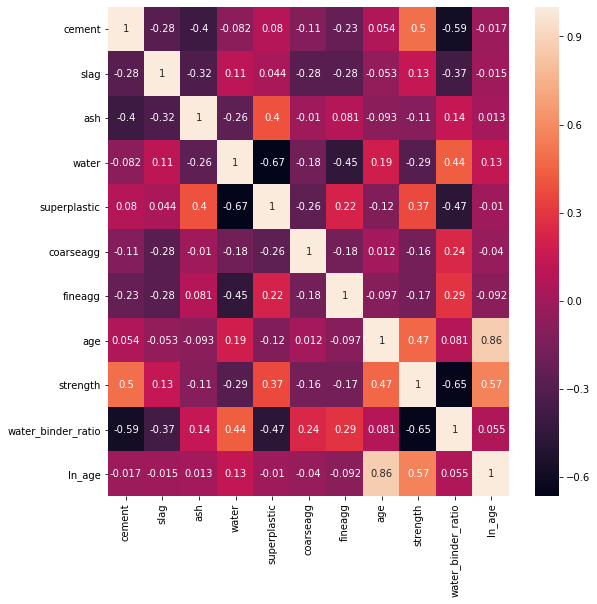

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

Note that **`ln_age`** has a correlation of **0.57** with **`strength`** and **`water_binder_ratio`** has a correlation of **-0.65** with **`strength`**.

### <font style = "color:rgb(8,133,37)">Drop Feature</font>

Since we have created a new feature **`ln_age`**, we can now drop **`age`**. Since **`water_binder_ratio`** has already taken into account **`cement`**, **`slag`**, **`water`** and **`ash`**, we can also consider dropping these features. But, for now, we won't drop them.

In [30]:
# Create df backup
df_backup = df.copy()

In [31]:
# Drop age
df.drop("age", inplace=True, axis=1)

Instead of dropping other features directly, we will use the help of VIF and p-values for this along with a linear regression model.

### <font style = "color:rgb(8,133,37)">Linear Model</font>

Before we create the linear model, let's scale the values using MinMax scaling.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

In [33]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,water_binder_ratio,ln_age
0,0.089726,0.593214,0.000000,0.731089,0.000000,0.496512,0.418048,0.343341,0.512725,0.685120
1,0.152740,0.118083,0.621189,0.314114,0.423529,0.813372,0.547115,0.263859,0.479817,0.542605
2,0.337900,0.000000,0.478261,0.582565,0.215686,0.453198,0.722993,0.334994,0.563244,0.685120
3,0.374429,0.318993,0.000000,0.957103,0.000000,0.380814,0.205642,0.542170,0.548822,0.685120
4,0.120548,0.513186,0.000000,0.636993,0.356863,0.716279,0.277887,0.198829,0.506044,0.685120


In [34]:
y_train = df.pop("strength")
X_train = df.copy()

In [35]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     559.2
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:29   Log-Likelihood:                 1072.8
No. Observations:                1030   AIC:                            -2126.
Df Residuals:                    1020   BIC:                            -2076.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2965      0

By using all the features, we were able to get an R-squared value of **0.832**. Let's remove variables based on P-value and VIF value.

In [37]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def VIF():
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [39]:
vif = VIF()

In [40]:
vif

,Features,VIF
3,water,75.22
7,water_binder_ratio,73.08
0,cement,28.25
6,fineagg,18.03
5,coarseagg,11.28
1,slag,9.03
8,ln_age,8.89
4,superplastic,6.48
2,ash,4.28


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Let's start with **`water`**. It has a high p-value and the highest VIF value.

In [41]:
X_train.drop("water",axis=1, inplace=True)

In [42]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     629.1
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:30   Log-Likelihood:                 1072.4
No. Observations:                1030   AIC:                            -2127.
Df Residuals:                    1021   BIC:                            -2082.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3240      0

Even though there is a drop in R-squared value, the adjusted R-squared value is the same and the p-values are now about 0.

Let's now try following equation (2) and see if there is a linear relation between **`ln_age`** and **`strength`**.

In [43]:
# Add a constant
X_train_lm = sm.add_constant(X_train[["ln_age"]])

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     490.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           3.24e-89
Time:                        14:29:30   Log-Likelihood:                 356.74
No. Observations:                1030   AIC:                            -709.5
Df Residuals:                    1028   BIC:                            -699.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.016      5.537      0.0

This shows two things:

1. A very simple linear model between `ln_age` and `strength` is able to explain just 32% variance.
2. A more complex linear model shown before was able to explain 83% variance which is pretty good.

This model can serve as the baseline model. Let's now try quadratic or higher degrees of parameters and see their effect.

In [44]:
df = df_backup.copy()

In [45]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'water_binder_ratio', 'ln_age'],
      dtype='object')

In [46]:
for col in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']:
    df["{}^2".format(col)] = df[col]**2

In [47]:
abs(df.corr()["strength"]).sort_values(ascending=False)

strength              1.000000
water_binder_ratio    0.651804
ln_age                0.568469
cement                0.497832
cement^2              0.487777
age                   0.469625
superplastic          0.366375
age^2                 0.355058
superplastic^2        0.333293
water                 0.291203
water^2               0.270538
fineagg               0.169584
fineagg^2             0.165601
coarseagg             0.164935
coarseagg^2           0.159992
slag                  0.134859
ash^2                 0.128096
ash                   0.105755
slag^2                0.075684
Name: strength, dtype: float64

In [48]:
y_train = df.pop("strength")
X_train = df.copy()

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     326.4
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                -3373.2
No. Observations:                1030   AIC:                             6784.
Df Residuals:                    1011   BIC:                             6878.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -90.2175     38

In [50]:
X_train.drop("coarseagg^2",axis=1,inplace=True)

In [51]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     345.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                -3373.4
No. Observations:                1030   AIC:                             6783.
Df Residuals:                    1012   BIC:                             6872.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -70.5347     23

In [52]:
X_train.drop("water_binder_ratio",axis=1,inplace=True)
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     367.2
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                -3374.0
No. Observations:                1030   AIC:                             6782.
Df Residuals:                    1013   BIC:                             6866.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -72.6592     23.691     -3.

In [53]:
X_train.drop("cement^2",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     390.4
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                -3375.9
No. Observations:                1030   AIC:                             6784.
Df Residuals:                    1014   BIC:                             6863.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -73.6048     23.718     -3.

In [54]:
X_train.drop("age",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm).fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     415.5
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                -3379.2
No. Observations:                1030   AIC:                             6788.
Df Residuals:                    1015   BIC:                             6863.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.9782     23.499     -3.

In [55]:
X_train.drop("age^2",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm).fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     446.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                -3380.3
No. Observations:                1030   AIC:                             6789.
Df Residuals:                    1016   BIC:                             6858.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -84.3059     23.494     -3.

In [56]:
X_train.drop("ash^2",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm).fit()

print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     481.9
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                -3382.7
No. Observations:                1030   AIC:                             6791.
Df Residuals:                    1017   BIC:                             6856.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -91.7772     23.287     -3.

If we have a look at the above model, there are several parameters which have a degree 2 and the model is able to explain 85% variance.

Let's also try degree 3 and see if it helps.

In [57]:
df = df_backup.copy()

In [58]:
for col in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']:
    df["{}^3".format(col)] = df[col]**3
    df["{}^2".format(col)] = df[col]**2

In [59]:
abs(df.corr()["strength"]).sort_values(ascending=False)

strength              1.000000
water_binder_ratio    0.651804
ln_age                0.568469
cement                0.497832
cement^2              0.487777
age                   0.469625
cement^3              0.465639
superplastic          0.366375
age^2                 0.355058
superplastic^2        0.333293
water                 0.291203
age^3                 0.285873
superplastic^3        0.278162
water^2               0.270538
water^3               0.246830
fineagg               0.169584
fineagg^2             0.165601
coarseagg             0.164935
fineagg^3             0.160749
coarseagg^2           0.159992
coarseagg^3           0.154527
ash^3                 0.139063
slag                  0.134859
ash^2                 0.128096
ash                   0.105755
slag^2                0.075684
slag^3                0.039061
Name: strength, dtype: float64

In [60]:
y_train = df.pop("strength")
X_train = df.copy()

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     260.3
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:                -3306.8
No. Observations:                1030   AIC:                             6668.
Df Residuals:                    1003   BIC:                             6801.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1961.7620    394

In [62]:
X_train.drop("age^3",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr10 = sm.OLS(y_train, X_train_lm).fit()

print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     271.0
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:                -3306.8
No. Observations:                1030   AIC:                             6666.
Df Residuals:                    1004   BIC:                             6794.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1959.9260    394

In [63]:
X_train.drop("slag^2",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr11 = sm.OLS(y_train, X_train_lm).fit()

print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     282.1
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:                -3307.5
No. Observations:                1030   AIC:                             6665.
Df Residuals:                    1005   BIC:                             6788.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1926.4980    393

In [64]:
X_train.drop("ash",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr12 = sm.OLS(y_train, X_train_lm).fit()

print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     293.9
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:                -3308.7
No. Observations:                1030   AIC:                             6665.
Df Residuals:                    1006   BIC:                             6784.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1834.7761    389

In [65]:
X_train.drop("coarseagg^3",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr13 = sm.OLS(y_train, X_train_lm).fit()

print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     306.7
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:                -3310.0
No. Observations:                1030   AIC:                             6666.
Df Residuals:                    1007   BIC:                             6779.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1273.8154    146

In [66]:
X_train.drop("coarseagg^2",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr14 = sm.OLS(y_train, X_train_lm).fit()

print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     321.6
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:                -3310.0
No. Observations:                1030   AIC:                             6664.
Df Residuals:                    1008   BIC:                             6773.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1271.2991    145

In [67]:
X_train.drop("water_binder_ratio",axis=1,inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr15 = sm.OLS(y_train, X_train_lm).fit()

print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     337.2
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:29:33   Log-Likelihood:                -3311.0
No. Observations:                1030   AIC:                             6664.
Df Residuals:                    1009   BIC:                             6768.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1265.5010    145.771     -8.

The above model is able to explain 85% variance and has features with degree 2 and 3 as well.

This shows that Concrete Compressive Strength has a non-linear relationship with the features provided.

### <font style = "color:rgb(8,133,37)">Gaussians</font>

We have already explored the number of gaussians in each feature before. This time we will use the new set of features.

In [68]:
df = df_backup.copy()

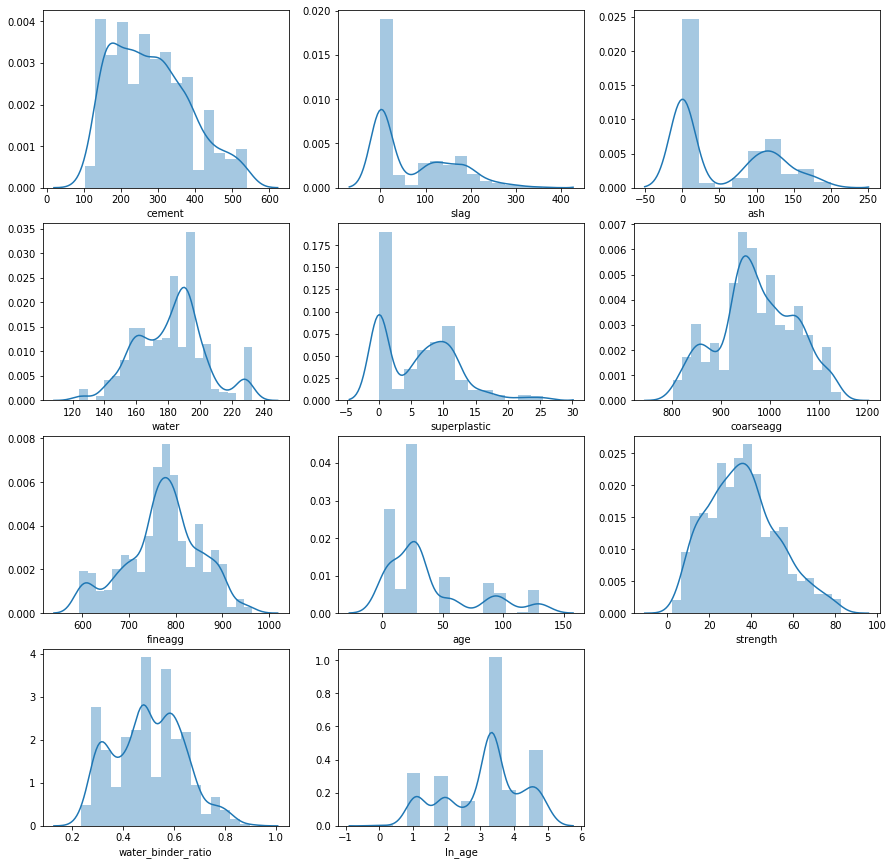

In [69]:
# Distribution
plt.figure(figsize=(15,15))

for col in range(len(df.columns)):
    # Plot on a subplot
    plt.subplot(4,3,col+1)
    sns.distplot(df[df.columns[col]])
plt.show()

In [70]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_binder_ratio,ln_age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,0.575998,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,0.554116,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,0.609589,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,0.600000,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,0.571555,3.332205


### <font style = "color:rgb(8,133,37)">Individual Clusters</font>

Let's have a look at individual feature and try to understand the effect of various clusters on **`strength`**.

#### <font style = "color:rgb(8,133,37)">cement</font>

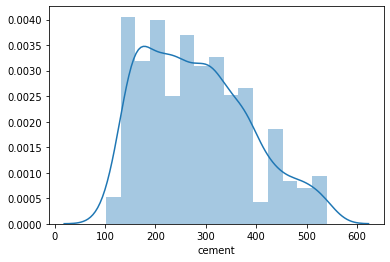

In [71]:
sns.distplot(df["cement"])
plt.show()

**`cement`** has an approximately normal distribution so there is no need of clustering here.

#### <font style = "color:rgb(8,133,37)">slag</font>

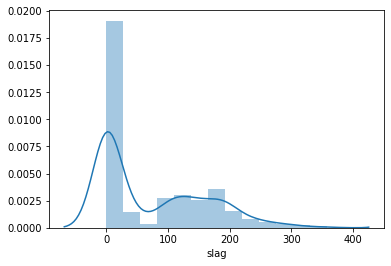

In [72]:
sns.distplot(df["slag"])
plt.show()

We can see 2 clusters here in slag so let's try to use GMM for the same.

We will also create a function for GMM since we are going to use it frequently.

In [73]:
from sklearn.mixture import GaussianMixture as GMM

In [74]:
def GMM_(n_components,feature):
    gmm = GMM(n_components=n_components,random_state=42)
    gmm.fit(df[feature].values.reshape(-1,1))
    df["{}_gmm".format(feature)] = gmm.predict(df[feature].values.reshape(-1,1))
    print(df[[feature,"{}_gmm".format(feature),"strength"]].corr()["strength"])
    orig_corr = df[[feature,"{}_gmm".format(feature),"strength"]].corr()["strength"][feature]
    new_corr = df[[feature,"{}_gmm".format(feature),"strength"]].corr()["strength"]["{}_gmm".format(feature)]
    print("==========================================================")
    if abs(new_corr) > abs(orig_corr):
        print("""\tCorrelation between **{}_gmm** and **strength** is higher than between **{}** and 
        **strength** so the created clusters can be useful here""".format(feature,feature))
    else:
        print("""\tCorrelation between **{}_gmm** and **strength** is lower than between **{}** and 
        **strength** so the created clusters might not be useful here""".format(feature,feature))
        df.drop("{}_gmm".format(feature),axis=1,inplace=True)

In [75]:
GMM_(2,"slag")

slag        0.134859
slag_gmm    0.231902
strength    1.000000
Name: strength, dtype: float64
	Correlation between **slag_gmm** and **strength** is higher than between **slag** and 
        **strength** so the created clusters can be useful here


#### <font style = "color:rgb(8,133,37)">ash</font>

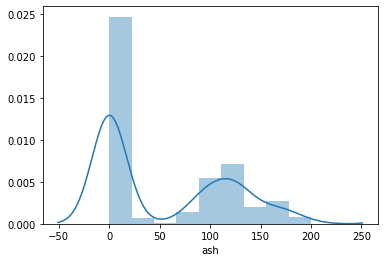

In [76]:
sns.distplot(df["ash"])
plt.show()

We can clearly see 2 possible clusters here so let's go ahead and fit GMM.

In [77]:
GMM_(2,"ash")

ash        -0.105755
ash_gmm    -0.063090
strength    1.000000
Name: strength, dtype: float64
	Correlation between **ash_gmm** and **strength** is lower than between **ash** and 
        **strength** so the created clusters might not be useful here


#### <font style = "color:rgb(8,133,37)">water</font>

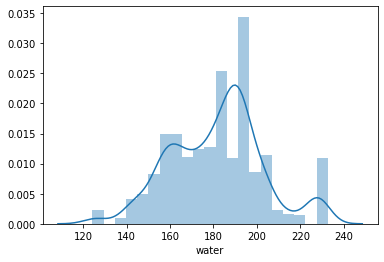

In [78]:
sns.distplot(df["water"])
plt.show()

We can see 4 gaussian distributions mix here. 

In [79]:
GMM_(4,"water")

water       -0.291203
water_gmm    0.359094
strength     1.000000
Name: strength, dtype: float64
	Correlation between **water_gmm** and **strength** is higher than between **water** and 
        **strength** so the created clusters can be useful here


#### <font style = "color:rgb(8,133,37)">superplastic</font>

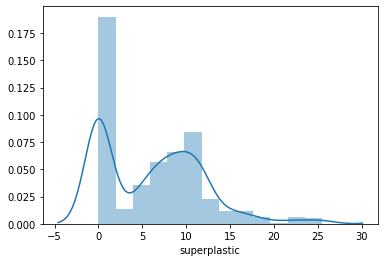

In [80]:
sns.distplot(df["superplastic"])
plt.show()

We can see 2 gaussians here.

In [81]:
GMM_(2,"superplastic")

superplastic        0.366375
superplastic_gmm    0.287904
strength            1.000000
Name: strength, dtype: float64
	Correlation between **superplastic_gmm** and **strength** is lower than between **superplastic** and 
        **strength** so the created clusters might not be useful here


#### <font style = "color:rgb(8,133,37)">coarseagg</font>

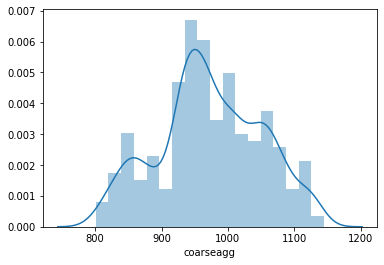

In [82]:
sns.distplot(df["coarseagg"])
plt.show()

We can see 2 clusters here.

In [83]:
GMM_(2,"coarseagg")

coarseagg       -0.164935
coarseagg_gmm    0.104919
strength         1.000000
Name: strength, dtype: float64
	Correlation between **coarseagg_gmm** and **strength** is lower than between **coarseagg** and 
        **strength** so the created clusters might not be useful here


#### <font style = "color:rgb(8,133,37)">fineagg</font>

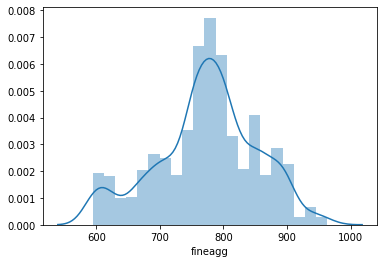

In [84]:
sns.distplot(df["fineagg"])
plt.show()

We can see 2 or 3 gaussians here.

In [85]:
GMM_(2,"fineagg")

fineagg       -0.169584
fineagg_gmm    0.149841
strength       1.000000
Name: strength, dtype: float64
	Correlation between **fineagg_gmm** and **strength** is lower than between **fineagg** and 
        **strength** so the created clusters might not be useful here


In [86]:
GMM_(3,"fineagg")

fineagg       -0.169584
fineagg_gmm   -0.003991
strength       1.000000
Name: strength, dtype: float64
	Correlation between **fineagg_gmm** and **strength** is lower than between **fineagg** and 
        **strength** so the created clusters might not be useful here


#### <font style = "color:rgb(8,133,37)">age</font>

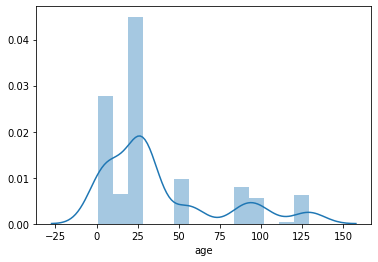

In [87]:
sns.distplot(df["age"])
plt.show()

We can 3 gaussians here.

In [88]:
GMM_(3,"age")

age         0.469625
age_gmm     0.339509
strength    1.000000
Name: strength, dtype: float64
	Correlation between **age_gmm** and **strength** is lower than between **age** and 
        **strength** so the created clusters might not be useful here


#### <font style = "color:rgb(8,133,37)">water_binder_ratio</font>

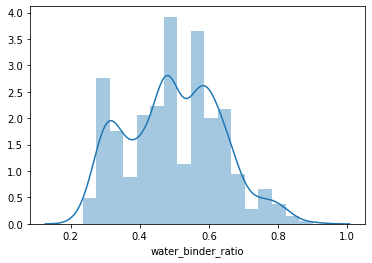

In [89]:
sns.distplot(df["water_binder_ratio"])
plt.show()

We can 2 or 3 gaussians here.

In [90]:
GMM_(2,"water_binder_ratio")

water_binder_ratio       -0.651804
water_binder_ratio_gmm   -0.505151
strength                  1.000000
Name: strength, dtype: float64
	Correlation between **water_binder_ratio_gmm** and **strength** is lower than between **water_binder_ratio** and 
        **strength** so the created clusters might not be useful here


In [91]:
GMM_(3,"water_binder_ratio")

water_binder_ratio       -0.651804
water_binder_ratio_gmm    0.275383
strength                  1.000000
Name: strength, dtype: float64
	Correlation between **water_binder_ratio_gmm** and **strength** is lower than between **water_binder_ratio** and 
        **strength** so the created clusters might not be useful here


#### <font style = "color:rgb(8,133,37)">ln_age</font>

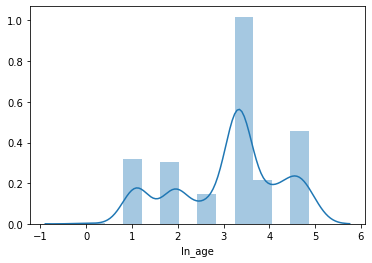

In [92]:
sns.distplot(df["ln_age"])
plt.show()

We can see 4 gaussians here.

In [93]:
GMM_(4,"ln_age")

ln_age        0.568469
ln_age_gmm   -0.058029
strength      1.000000
Name: strength, dtype: float64
	Correlation between **ln_age_gmm** and **strength** is lower than between **ln_age** and 
        **strength** so the created clusters might not be useful here


In [94]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_binder_ratio,ln_age,slag_gmm,water_gmm
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,0.575998,3.332205,1,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,0.554116,2.639057,1,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,0.609589,3.332205,0,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,0.600000,3.332205,1,3
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,0.571555,3.332205,1,0


### <font style = "color:rgb(8,133,37)">Conclusion</font>

We can see that we have taken forward clusters for **`slag`** and **`water`**.

## <font style = "color:rgb(50,120,229)">Deliverable - 3: Create the Model</font>

### <font style = "color:rgb(8,133,37)">Decision Tree Regressor</font>

So far we used **Gaussian Mixture Models**. Now, let's go for Decision Tree (CART) to find out feature importance. 

Let's first scale the values.

In [95]:
scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_binder_ratio,ln_age,slag_gmm,water_gmm
0,0.089726,0.593214,0.000000,0.731089,0.000000,0.496512,0.418048,0.210117,0.343341,0.512725,0.685120,1.0,0.000000
1,0.152740,0.118083,0.621189,0.314114,0.423529,0.813372,0.547115,0.101167,0.263859,0.479817,0.542605,1.0,0.666667
2,0.337900,0.000000,0.478261,0.582565,0.215686,0.453198,0.722993,0.210117,0.334994,0.563244,0.685120,0.0,0.000000
3,0.374429,0.318993,0.000000,0.957103,0.000000,0.380814,0.205642,0.210117,0.542170,0.548822,0.685120,1.0,1.000000
4,0.120548,0.513186,0.000000,0.636993,0.356863,0.716279,0.277887,0.210117,0.198829,0.506044,0.685120,1.0,0.000000


In [98]:
# Obtain X and y from df
X = df[['slag','cement', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
       'water_binder_ratio', 'ln_age', 'slag_gmm', 'water_gmm']]
y = df["strength"]

In [99]:
X.head()

,slag,cement,ash,water,superplastic,coarseagg,fineagg,age,water_binder_ratio,ln_age,slag_gmm,water_gmm
0,0.593214,0.089726,0.000000,0.731089,0.000000,0.496512,0.418048,0.210117,0.512725,0.685120,1.0,0.000000
1,0.118083,0.152740,0.621189,0.314114,0.423529,0.813372,0.547115,0.101167,0.479817,0.542605,1.0,0.666667
2,0.000000,0.337900,0.478261,0.582565,0.215686,0.453198,0.722993,0.210117,0.563244,0.685120,0.0,0.000000
3,0.318993,0.374429,0.000000,0.957103,0.000000,0.380814,0.205642,0.210117,0.548822,0.685120,1.0,1.000000
4,0.513186,0.120548,0.000000,0.636993,0.356863,0.716279,0.277887,0.210117,0.506044,0.685120,1.0,0.000000


In [100]:
y.head()

0    0.343341
1    0.263859
2    0.334994
3    0.542170
4    0.198829
Name: strength, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [103]:
dt = DecisionTreeRegressor()

In [104]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [105]:
print('Feature importances: \n',pd.DataFrame(dt.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                          Imp
slag                0.011576
cement              0.048356
ash                 0.005521
water               0.025854
superplastic        0.019187
coarseagg           0.010357
fineagg             0.019237
age                 0.219629
water_binder_ratio  0.466876
ln_age              0.171246
slag_gmm            0.000017
water_gmm           0.002146


The most important features are:

1. `water_binder_ratio`
2. `ln_age`
3. `cement`
4. `water`
5. `age`
6. `superplastic`
7. `fineagg`
8. `coarseagg`

### <font style = "color:rgb(8,133,37)">Deliverable - 4: Tuning the Model</font>

Before we proceed with hyperparameter tuning, let's see what algorithms can be used. We know from our previous analysis that linear models were also able to give good performance (80%+ R-squared value), and that GMM clusters were not able to give very good results. So, we will start off by using Decision Trees, then move to Random Forests and finally use more advanced algorithms like Gradient Boosting Algorithm, Ada Boosting Regressor, Bagging Regressor, kNN Regressor, Support Vector Regressor and lastly, ensemble regressor - kNN + Support Vector Regressor + Logistic Regression. We will close the project by finding the performance range at 95% confidence level.

In [106]:
from sklearn import metrics

In [107]:
y_pred = dt.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9946752528275749
Performance on testing data using DT: 0.8511673852280405
Accuracy DT:  0.8511673852280405


There is a overfitting in the model as the dataset is performing 99.47% accurately in trainnig data. However, the accuracy on test data drops (83.82%).

To create a summary, we will keep on storing these results in a dataframe.

In [108]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167


For each model, we will also carry out K Fold Cross Validation.

In [109]:
from sklearn.model_selection import KFold

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
kfold = KFold(n_splits=10, random_state=42)
results1 = cross_val_score(dt,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8725970018304137
Standard Deviation:  0.0391274880944818


/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [112]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597


Let's now try using only the top few features and see how the model performs.

In [113]:
X = df.drop(['slag_gmm','water_gmm','ash','slag','strength'],axis=1)
y = df['strength']

In [114]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [115]:
dt = DecisionTreeRegressor()
dt.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [116]:
y_pred = dt.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9946752606862289
Performance on testing data using DT: 0.8489776204939634
Accuracy DT:  0.8489776204939634


In [117]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree 2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978


Let's try to regularize/prune the decision tree to make it simpler.

In [118]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [119]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
feature_cols = X.columns

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


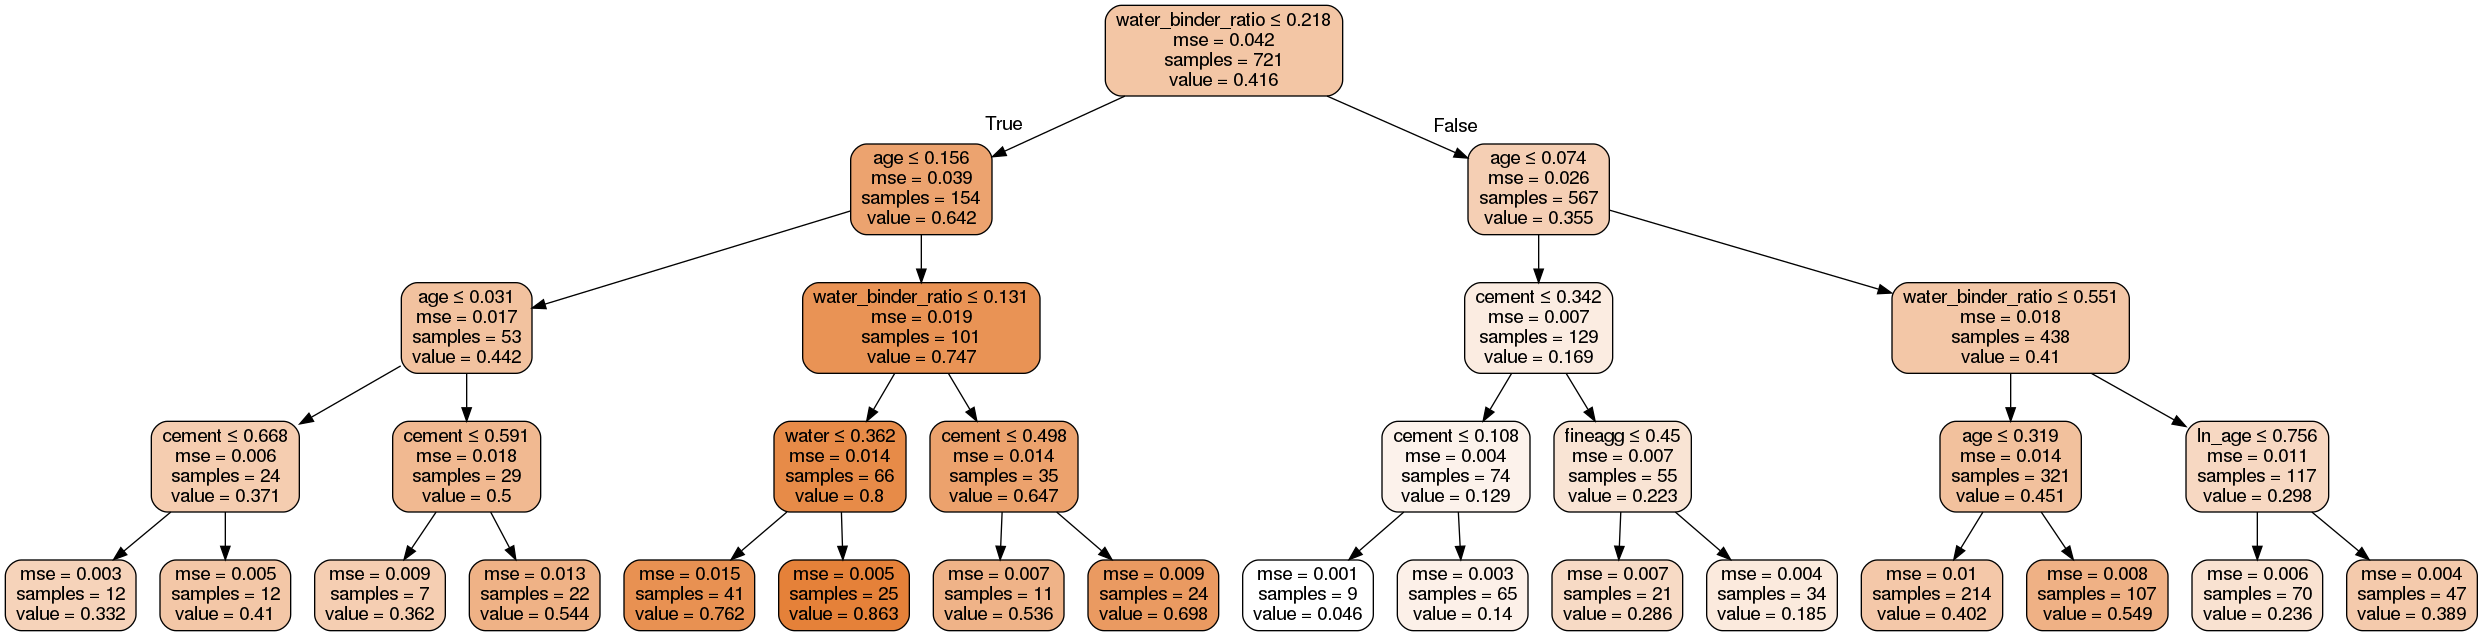

In [120]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [121]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)

Performance on training data using DT: 0.8178753446383492
Performance on testing data using DT: 0.7899643208098955
Accuracy DT:  0.7899643208098955


Not only is this model simple, but is also not overfitting the training datase (the difference in accuracies is just 2%)

In [122]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964


Let's now carry K-Fold CV.

In [123]:
kfold = KFold(n_splits=10, random_state=42)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7786376694253806
Standard Deviation:  0.04279562592123082


/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [124]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638


Now that we have tried different Decision Tree variations, let's now try ensemble techniques - Random Forest Regressor.

### <font style = "color:rgb(8,133,37)">Random Forest Regressor</font>

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
X = df.drop("strength",axis=1)
y = df["strength"]

In [127]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [128]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [129]:
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)

Performance on training data using RFR: 0.983836033742219
Performance on testing data using RFR: 0.9099304850799623
Accuracy DT:  0.7899643208098955


The difference in the training and testing data accuracy shows that there is overfitting.

In [130]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964


Let's now perform k-fold CV.

In [131]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9188264846109933
Standard Deviation:  0.024879724246616743


In [132]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826


### <font style = "color:rgb(8,133,37)">Gradient Boosting Regressor</font>

In [133]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

In [134]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)

Performance on training data using GBR: 0.9544180572246411
Performance on testing data using GBR: 0.9139083108268672
Accuracy DT:  0.9139083108268672


In [136]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908


There is an improvement in accuracy but let's check k fold performance.

In [137]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9149609813445272
Standard Deviation:  0.020208492483115164


In [138]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961


Even the K-Fold GBR accuracy is better than Random Forest Regressor K-Fold accuracy.

Let's next check Ada Boosting Regressor.

### <font style = "color:rgb(8,133,37)">Ada Boosting Regressor</font>

In [139]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [140]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8559703739939619
Performance on testing data using GBR: 0.8119552850244229
Accuracy DT:  0.8119552850244229
MSE:  0.008493889948351981


In [141]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


With ada boosting, the accuracy has decreased significantly.

In [142]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8258495171333007
Standard Deviation:  0.026815715581838245


In [143]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


### <font style = "color:rgb(8,133,37)">Bagging Regressor</font>

In [144]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [145]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using Bagging Regressor:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Bagging Regressor:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)

Performance on training data using Bagging Regressor: 0.9777687585756752
Performance on testing data using Bagging Regressor: 0.8917765533281332
Accuracy DT:  0.8917765533281332


The Bagging Regressor is clearly overfitting.

In [146]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


In [147]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9136006723717527
Standard Deviation:  0.025503272405665123


In [148]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


The bagging regressor k-fold accuracy has is better than ada boosting regressor accuracy but lower than GBR.

### <font style = "color:rgb(8,133,37)">kNN Regressor</font>

In [149]:
from sklearn.neighbors import KNeighborsRegressor

In [150]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

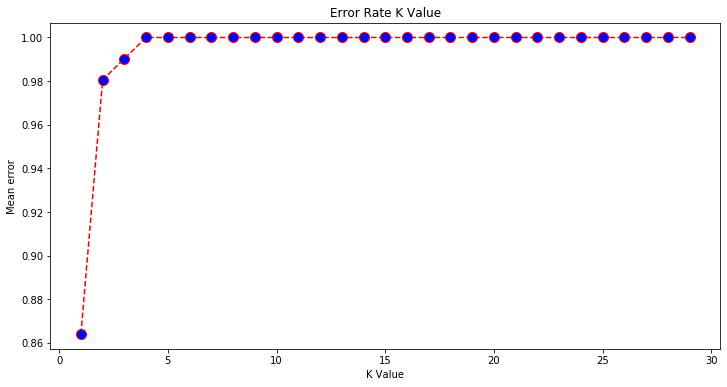

In [151]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

From the above plot, we can use K = 3.

In [152]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [153]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)

Performance on training data using KNNR: 0.9269781112090636
Performance on testing data using KNNR: 0.8386246358559997
Accuracy KNNR:  0.8386246358559997


In [154]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


In [155]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.848747828315001
Standard Deviation:  0.03522861640091005


/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [156]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


### <font style = "color:rgb(8,133,37)">Support Vector Regressor</font>

In [157]:
from sklearn.svm import SVR

In [158]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [159]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)

Performance on training data using SVR: 0.8362014327762386
Performance on testing data using SVR: 0.8325602958914913
Accuracy SVR:  0.8325602958914913


In [160]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


In [161]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8256202763363282
Standard Deviation:  0.029304700201865107


In [162]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


### <font style = "color:rgb(8,133,37)">Ensemble Regressor</font>


**Note**: `VotingRegressor` is available from sklearn version 0.21

In [163]:
import sklearn
print(sklearn.__version__)

0.22


In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
#Multiple model Ensemble
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=SVR(kernel='linear')

In [166]:
from sklearn.ensemble import VotingRegressor

In [167]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [168]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)

Performance on training data using ensemble: 0.8972175261443668
Performance on testing data using ensemble: 0.8645438273936056
Accuracy ensemble:  0.8645438273936056


In [169]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


In [170]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8697123278964339
Standard Deviation:  0.02208382985126855


In [171]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.851167
2,Decision Tree k fold,0.872597
3,Decision Tree 2,0.848978
4,Pruned Decision Tree,0.789964
5,Pruned Decision Tree k fold,0.778638
6,Random Forest Regressor,0.789964
7,Random Forest Regressor k fold,0.918826
8,Gradient Boost Regressor,0.913908
9,Gradient Boost Regressor k fold,0.914961
10,Ada Boosting Regressor,0.811955


### <font style = "color:rgb(8,133,37)">95% Confidence Interval Model Performance</font>

**Reference**: https://machinelearningmastery.com/confidence-intervals-for-machine-learning/

For this case, we will use the following models:

1. Random Forest Regressor
2. Gradient Boost Regressor
3. Bagging Regressor
4. Ensemble Regressor

In [172]:
XY = X.join(y)

### <font style = "color:rgb(8,133,37)">Random Forest Regressor</font>

In [177]:
from sklearn.utils import resample

In [184]:
values = XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = len(values)

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = []  
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    # picking rest of the data not considered in sample
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    
    
    # fit model
    rfReg = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfReg.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfReg.score(test[:, :-1] , y_test)
    predictions = rfReg.predict(test[:, :-1])  

    stats.append(score)
    
    if i%10 == 0:
        print("Iteration: {}/{}    -     {:.2f}".format(str(i+1).zfill(4),n_iterations,score))

Iteration: 0001/1000    -     0.88
Iteration: 0011/1000    -     0.90
Iteration: 0021/1000    -     0.88
Iteration: 0031/1000    -     0.92
Iteration: 0041/1000    -     0.91
Iteration: 0051/1000    -     0.91
Iteration: 0061/1000    -     0.87
Iteration: 0071/1000    -     0.89
Iteration: 0081/1000    -     0.90
Iteration: 0091/1000    -     0.91
Iteration: 0101/1000    -     0.91
Iteration: 0111/1000    -     0.90
Iteration: 0121/1000    -     0.91
Iteration: 0131/1000    -     0.91
Iteration: 0141/1000    -     0.90
Iteration: 0151/1000    -     0.90
Iteration: 0161/1000    -     0.87
Iteration: 0171/1000    -     0.90
Iteration: 0181/1000    -     0.90
Iteration: 0191/1000    -     0.90
Iteration: 0201/1000    -     0.91
Iteration: 0211/1000    -     0.87
Iteration: 0221/1000    -     0.90
Iteration: 0231/1000    -     0.90
Iteration: 0241/1000    -     0.87
Iteration: 0251/1000    -     0.91
Iteration: 0261/1000    -     0.87
Iteration: 0271/1000    -     0.90
Iteration: 0281/1000

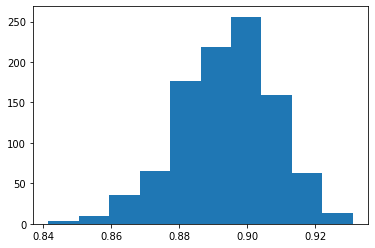

95.0 confidence interval 86.2% and 92.0%


In [185]:
# plot scores
plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                    # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100     # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### <font style = "color:rgb(8,133,37)">Gradient Boost Regressor</font>

In [186]:
values = XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = len(values)

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = []  
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    # picking rest of the data not considered in sample
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    
    
    # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)
    
    if i%10 == 0:
        print("Iteration: {}/{}    -     {:.2f}".format(str(i+1).zfill(4),n_iterations,score))

Iteration: 0001/1000    -     0.88
Iteration: 0011/1000    -     0.87
Iteration: 0021/1000    -     0.89
Iteration: 0031/1000    -     0.89
Iteration: 0041/1000    -     0.89
Iteration: 0051/1000    -     0.84
Iteration: 0061/1000    -     0.88
Iteration: 0071/1000    -     0.87
Iteration: 0081/1000    -     0.89
Iteration: 0091/1000    -     0.88
Iteration: 0101/1000    -     0.87
Iteration: 0111/1000    -     0.89
Iteration: 0121/1000    -     0.88
Iteration: 0131/1000    -     0.88
Iteration: 0141/1000    -     0.89
Iteration: 0151/1000    -     0.88
Iteration: 0161/1000    -     0.90
Iteration: 0171/1000    -     0.89
Iteration: 0181/1000    -     0.86
Iteration: 0191/1000    -     0.87
Iteration: 0201/1000    -     0.89
Iteration: 0211/1000    -     0.89
Iteration: 0221/1000    -     0.86
Iteration: 0231/1000    -     0.88
Iteration: 0241/1000    -     0.89
Iteration: 0251/1000    -     0.87
Iteration: 0261/1000    -     0.88
Iteration: 0271/1000    -     0.87
Iteration: 0281/1000

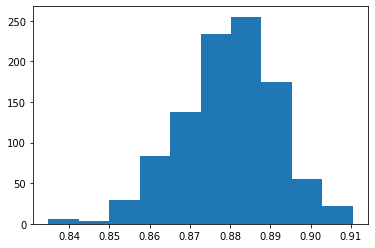

95.0 confidence interval 85.5% and 90.2%


In [187]:
# plot scores
plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                    # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100     # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### <font style = "color:rgb(8,133,37)">Bagging Regressor</font>

In [188]:
values = XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = len(values)

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = []  
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    # picking rest of the data not considered in sample
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    
    
    # fit model
    baggingReg = BaggingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    baggingReg.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = baggingReg.score(test[:, :-1] , y_test)
    predictions = baggingReg.predict(test[:, :-1])  

    stats.append(score)
    
    if i%10 == 0:
        print("Iteration: {}/{}    -     {:.2f}".format(str(i+1).zfill(4),n_iterations,score))

Iteration: 0001/1000    -     0.90
Iteration: 0011/1000    -     0.89
Iteration: 0021/1000    -     0.89
Iteration: 0031/1000    -     0.89
Iteration: 0041/1000    -     0.88
Iteration: 0051/1000    -     0.90
Iteration: 0061/1000    -     0.89
Iteration: 0071/1000    -     0.86
Iteration: 0081/1000    -     0.91
Iteration: 0091/1000    -     0.90
Iteration: 0101/1000    -     0.92
Iteration: 0111/1000    -     0.92
Iteration: 0121/1000    -     0.90
Iteration: 0131/1000    -     0.88
Iteration: 0141/1000    -     0.90
Iteration: 0151/1000    -     0.88
Iteration: 0161/1000    -     0.91
Iteration: 0171/1000    -     0.88
Iteration: 0181/1000    -     0.91
Iteration: 0191/1000    -     0.89
Iteration: 0201/1000    -     0.88
Iteration: 0211/1000    -     0.86
Iteration: 0221/1000    -     0.89
Iteration: 0231/1000    -     0.90
Iteration: 0241/1000    -     0.89
Iteration: 0251/1000    -     0.90
Iteration: 0261/1000    -     0.90
Iteration: 0271/1000    -     0.89
Iteration: 0281/1000

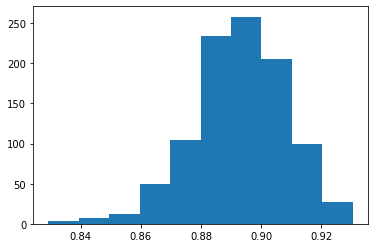

95.0 confidence interval 86.0% and 92.1%


In [189]:
# plot scores
plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                    # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100     # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### <font style = "color:rgb(8,133,37)">Ensemble Regressor</font>

In [190]:
values = XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = len(values)

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = []  
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    # picking rest of the data not considered in sample
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    
    
    # fit model
    LR=LinearRegression()
    KN=KNeighborsRegressor(n_neighbors=3)
    SVM=SVR(kernel='linear')
    
    evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
    
    # fit against independent variables and corresponding target values
    evc.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = evc.score(test[:, :-1] , y_test)
    predictions = evc.predict(test[:, :-1])  

    stats.append(score)
    
    if i%10 == 0:
        print("Iteration: {}/{}    -     {:.2f}".format(str(i+1).zfill(4),n_iterations,score))

Iteration: 0001/1000    -     0.86
Iteration: 0011/1000    -     0.87
Iteration: 0021/1000    -     0.87
Iteration: 0031/1000    -     0.84
Iteration: 0041/1000    -     0.85
Iteration: 0051/1000    -     0.85
Iteration: 0061/1000    -     0.83
Iteration: 0071/1000    -     0.85
Iteration: 0081/1000    -     0.86
Iteration: 0091/1000    -     0.86
Iteration: 0101/1000    -     0.85
Iteration: 0111/1000    -     0.87
Iteration: 0121/1000    -     0.88
Iteration: 0131/1000    -     0.86
Iteration: 0141/1000    -     0.85
Iteration: 0151/1000    -     0.85
Iteration: 0161/1000    -     0.88
Iteration: 0171/1000    -     0.85
Iteration: 0181/1000    -     0.83
Iteration: 0191/1000    -     0.85
Iteration: 0201/1000    -     0.86
Iteration: 0211/1000    -     0.84
Iteration: 0221/1000    -     0.87
Iteration: 0231/1000    -     0.85
Iteration: 0241/1000    -     0.86
Iteration: 0251/1000    -     0.86
Iteration: 0261/1000    -     0.86
Iteration: 0271/1000    -     0.86
Iteration: 0281/1000

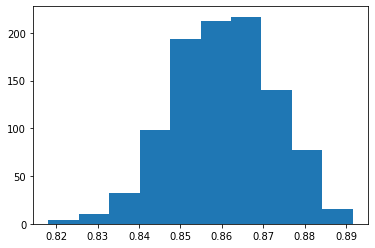

95.0 confidence interval 83.6% and 88.3%


In [191]:
# plot scores
plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                    # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100     # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

As we saw, **Random Forest Regressor** and **Bagging Regressor** have the best accuracies in the 95% confidence interval.